## Time Series

See the documentation : <br>
https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [3]:
import pandas as pd
import datetime as dt
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data


df=pd.read_csv('./data/ops.csv')

print(df.head())


   Unnamed: 0  Fallnummer                Datum Saal-ID Fallart Abteilungs-ID  \
0           6     1563300  2019-01-01 00:00:00    HKL1       s           IM2   
1           7     1563260  2019-01-01 00:00:00    HKL1       s           IM2   
2           8     1563543  2019-01-02 00:00:00    HKL1       s           IM2   
3           9     1560085  2019-01-03 00:00:00    HKL1       s           IM2   
4          10     1563499  2019-01-03 00:00:00    HKL1       a           IM2   

   Dringlichkeit           begin_time             end_time    OPS_1     OPS_2  \
0            3.0  2019-01-01 10:06:00  2019-01-01 10:20:00  1-275.0     3-605   
1            3.0  2019-01-01 16:21:00  2019-01-01 17:18:00  1-275.0  8-837.00   
2            3.0  2019-01-02 17:25:00  2019-01-02 17:45:00  1-275.0       NaN   
3            1.0  2019-01-03 08:24:00  2019-01-03 08:57:00  1-275.0       NaN   
4            1.0  2019-01-03 09:29:00  2019-01-03 09:50:00  1-275.0       NaN   

      OPS_3     OPS_4     OPS_5 

In [4]:
df.shape

(7915, 16)

## Orders in time dimension

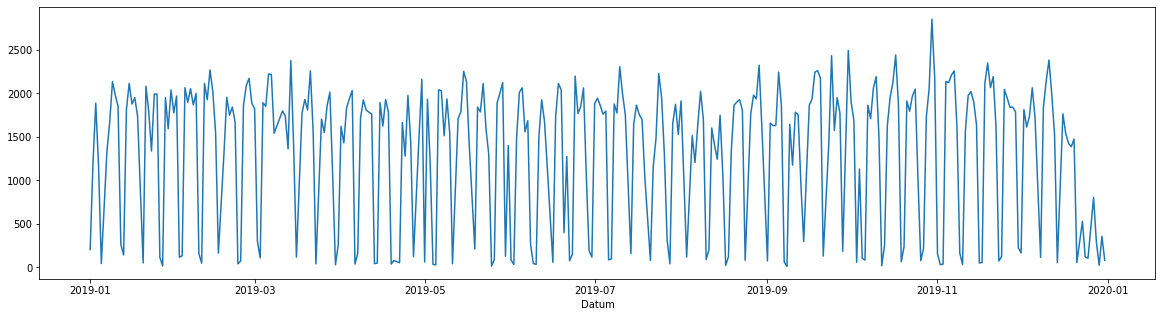

In [20]:
df['Datum'] = pd.to_datetime(df['Datum'])

ops_day=df.groupby(df['Datum'].dt.date)['op_time'].sum()

pyplot.figure(figsize=(20, 5))
ops_day.plot()
pyplot.show()

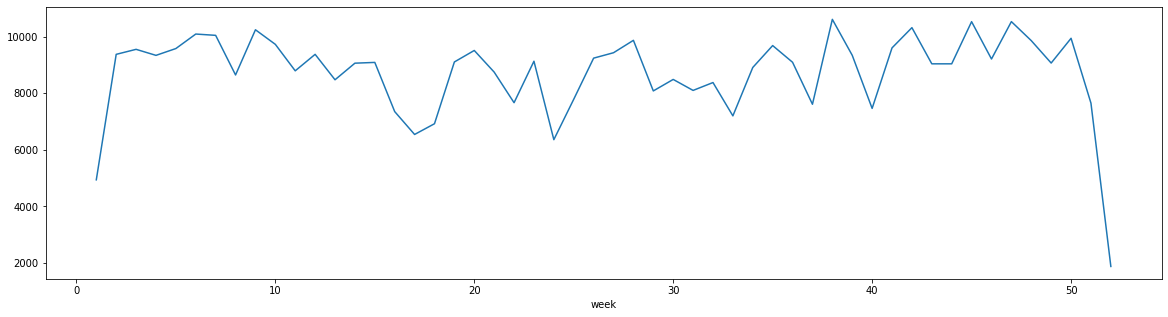

In [21]:
pyplot.figure(figsize=(20, 5))
ops_week=df.groupby(df['Datum'].dt.isocalendar().week)['op_time'].sum()
ops_week.plot()
pyplot.show()

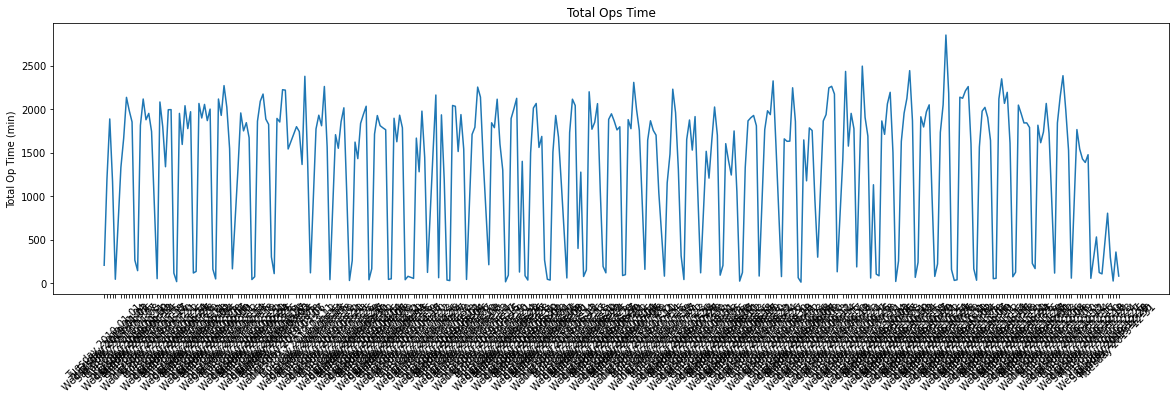

In [66]:
ops=df.groupby(df['Datum'].dt.date)['op_time'].sum().to_frame()
ops.index
date_list=pd.Series(pd.to_datetime(ops.index))
ops.head()



date_list=pd.Series(pd.to_datetime(ops.index))
pyplot.figure(figsize=(20, 5))
pyplot.plot(date_list, ops)
pyplot.title('Total Ops Time'  )
pyplot.ylabel('Total Op Time (min)')
res =[ ' '.join(tups) for tups in list(zip( date_list.dt.day_name().astype(str),date_list.dt.date.astype(str)))]
pyplot.xticks( ops.index, res,rotation=45)

pyplot.show()

In [67]:

# prepare expected column names
#sales_day.columns = ['ds', 'y']

ops['y']= ops['op_time']
ops['ds']= pd.Series()
ops['ds']=pd.to_datetime(ops.index)
# create test dataset, remove last 14 days
train = ops.drop(ops.index[-28:])

print(train.tail())

            op_time       y         ds
Datum                                 
2019-11-25   2045.0  2045.0 2019-11-25
2019-11-26   1947.0  1947.0 2019-11-26
2019-11-27   1840.0  1840.0 2019-11-27
2019-11-28   1841.0  1841.0 2019-11-28
2019-11-29   1788.0  1788.0 2019-11-29


/Users/kultiginbozdemir/opt/anaconda3/envs/statistics/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 456.656


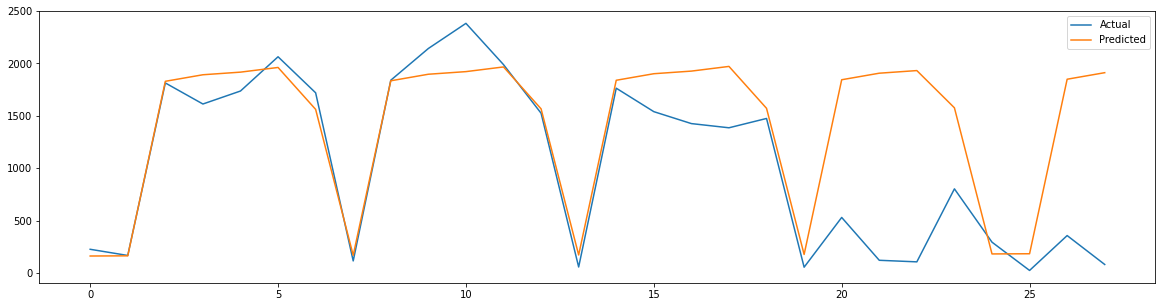

In [65]:

# define the model
model = Prophet(weekly_seasonality=True).add_country_holidays(country_name='NL')
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
future=list(ops.loc[ops.index[-28:],].index)
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = ops['y'][-28:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.figure(figsize=(20, 5))
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [64]:
ops.tail(28)

,op_time,y,ds
Datum,,,
2019-11-30,226.0,226.0,2019-11-30
2019-12-01,167.0,167.0,2019-12-01
2019-12-02,1814.0,1814.0,2019-12-02
2019-12-03,1613.0,1613.0,2019-12-03
2019-12-04,1737.0,1737.0,2019-12-04
2019-12-05,2064.0,2064.0,2019-12-05
2019-12-06,1720.0,1720.0,2019-12-06
2019-12-08,115.0,115.0,2019-12-08
2019-12-09,1840.0,1840.0,2019-12-09
